In [1]:
%cd ..

/Users/larremoreadmin/Library/CloudStorage/OneDrive-UCB-O365/classes/InfectiousDiseases


In [19]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

from dynamics import *
from sir_models import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1a.

In [13]:
x0 = np.array([0.99, 0.01])
params = {
    'beta': 3,
    'gamma': 2
}
sis_results, times = [], []
for timestep in [2, 1, 0.5]:
    sim_results = forward_euler(sis, params, x0, timestep, int(25 / timestep))
    sis_results.append(sim_results[0])
    times.append(sim_results[1])

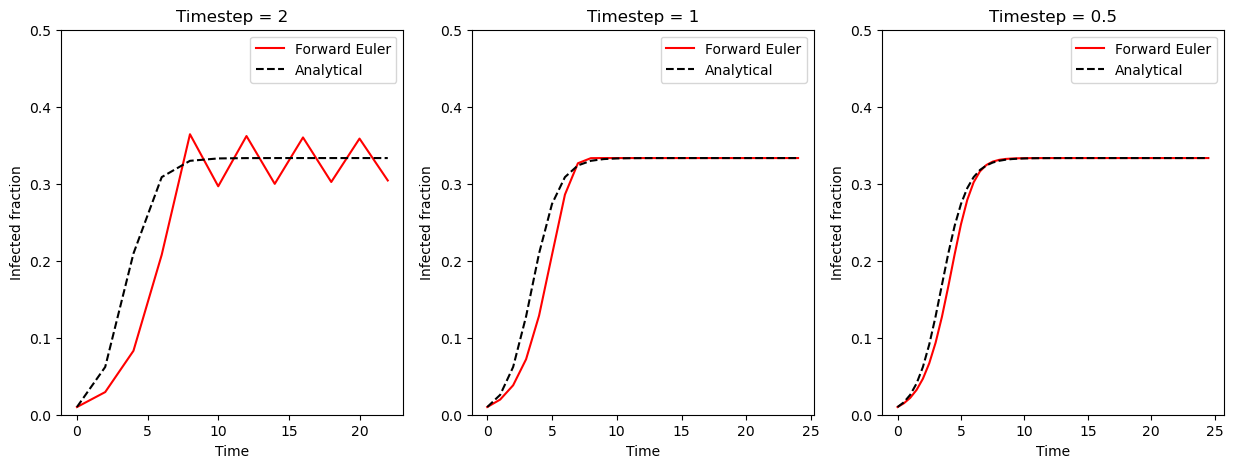

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, timestep in enumerate([2, 1, 0.5]):
    axs[i].plot(times[i], sis_results[i][1, :], label='Forward Euler', color="r")
    axs[i].plot(times[i], [closed_form_sis_i(t, beta=3, gamma=2, i_0=0.01) for t in times[i]], label="Analytical", color="k", linestyle='--')
    axs[i].set_title(f'Timestep = {timestep}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Infected fraction')
    axs[i].legend()
    axs[i].set_ylim(0, 0.5)
plt.savefig("hw2/plots/sis_forward_euler.png")

# 1c.

In [35]:
def max_abs_err(timestep, t_max, params, x0):
    """
    Compute the maximum absolute error between the Forward Euler and analytical solutions 
    to the normalized SIS system over the time interval [0, t_max].
    """
    states, times = forward_euler(sis, params, x0, timestep, int(t_max / timestep))
    i_numerical = states[1, :]
    i_analytical = np.array([closed_form_sis_i(t, **params, i_0=x0[1]) for t in times])
    return np.max(np.abs(i_numerical - i_analytical))

# 1d.

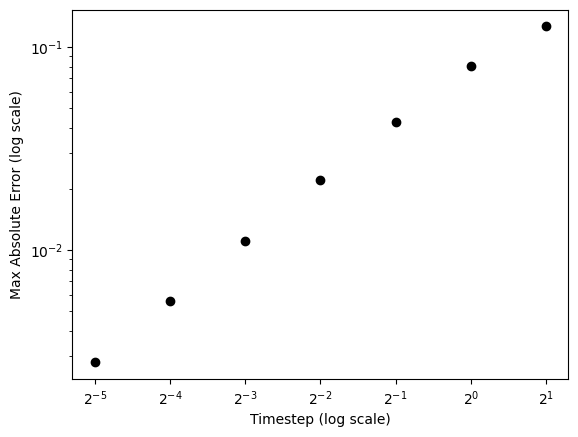

In [43]:
timesteps = np.logspace(1, -5, base=2, num=7)
plt.scatter(timesteps, [max_abs_err(dt, 10, params, x0).max() for dt in timesteps], color='k')
plt.xscale('log', base=2)
plt.yscale('log')
plt.xlabel('Timestep (log scale)')
plt.ylabel('Max Absolute Error (log scale)')
plt.savefig("hw2/plots/max_abs_err_vs_dt.png")

In [50]:
(43.5 * 200 + 4.7 * 1800) / 2

8580.0

In [52]:
8580 / 1800, 8580 / 200

(4.766666666666667, 42.9)

In [51]:
(44.5 * 210 + 4.8 * 1750) / 2

8872.5

In [53]:
8872.5 / 1750, 8872.5 / 210

(5.07, 42.25)

In [60]:
(28.1 + np.sqrt(28.1**2 - 4 * (3.1 * 25 - 42.9 * 4.77))) / 2

32.064868858806605

In [58]:
(28.1 + np.sqrt(28.1**2 - 4 * (3.1 * 25 - 42.9 * 4.77))) / (28.1 + np.sqrt(28.1**2 - 4 * (3 * 25.1 - 42.25 * 5.07)))

0.9899999892856834